In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv('Data/train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


## General information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

The dataset has 15k entries with 56 columns. No missing data

In [4]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [5]:
len(df.select_dtypes(include=["int64"]).columns)

56

All columns are numeric

## Distribution of the target column

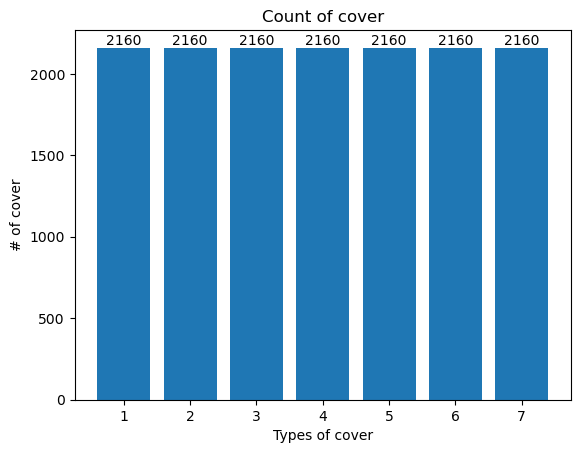

In [6]:
counts = df["Cover_Type"].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xticks(range(1, 8))
plt.xlabel("Types of cover")
plt.ylabel("# of cover")
plt.title("Count of cover")

for i, v in zip(counts.index, counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()


Dataset is balanced with the same frequency for each cover type. So accuracy tend to be a good score to later assess the models.

## Exploring the continuous variables

In [7]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

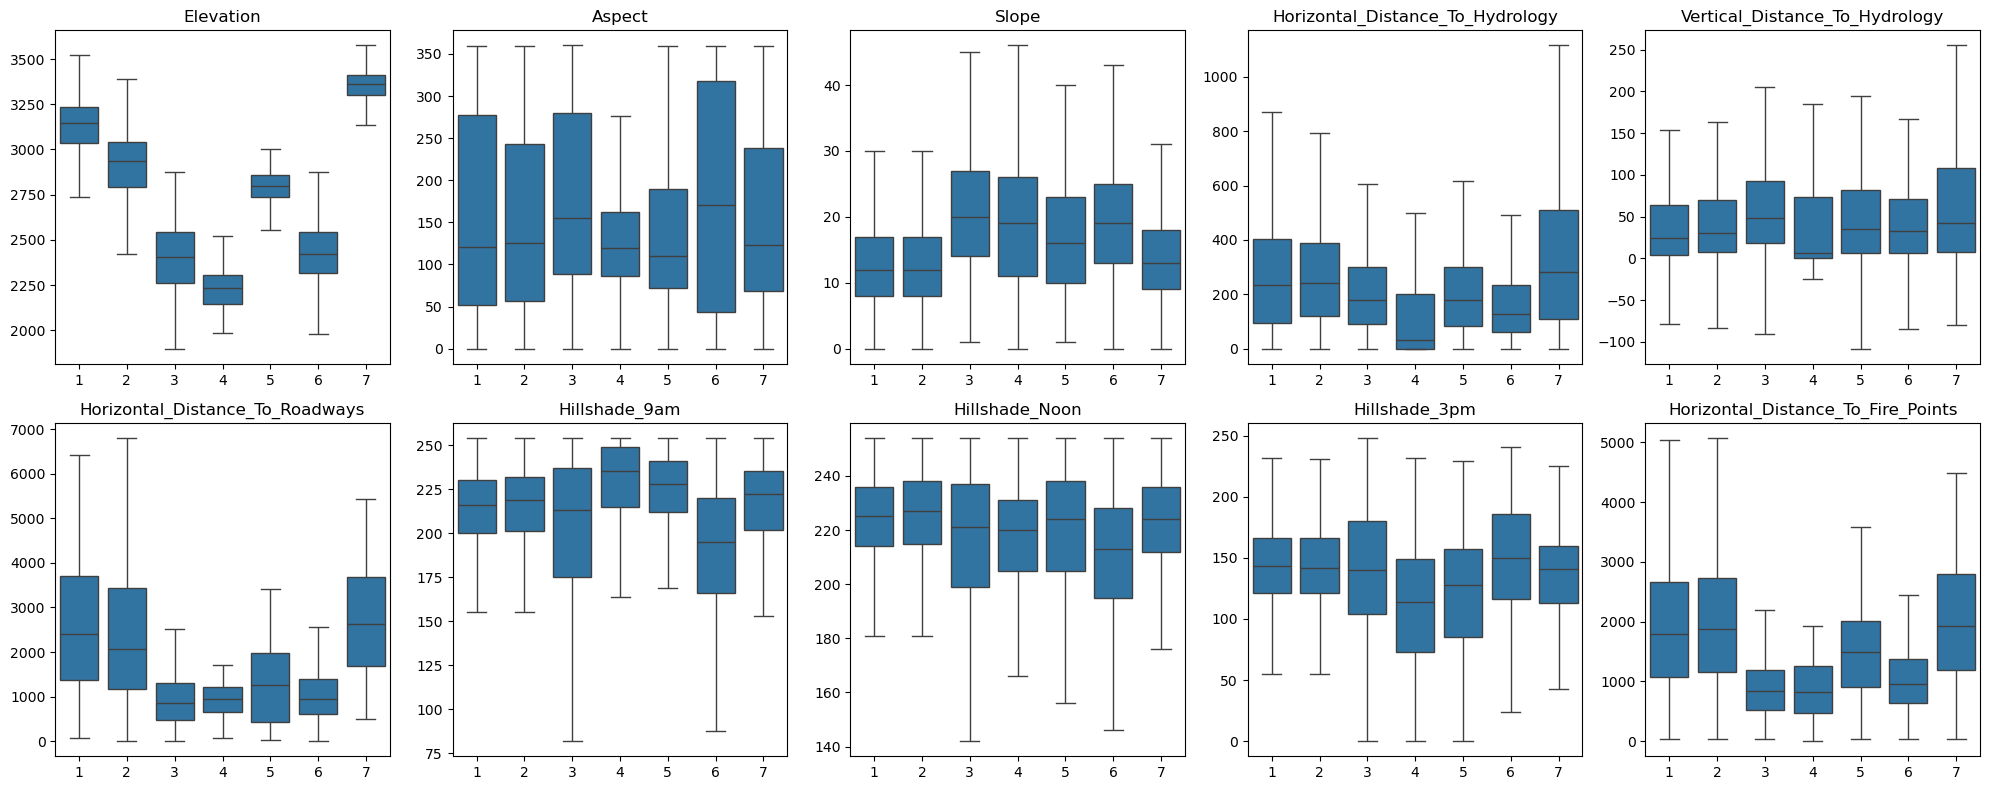

In [8]:
continuous_col = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(continuous_col):
    sns.boxplot(
        x="Cover_Type",
        y=col,
        data=df,
        showfliers=False,
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

As we can see, some of the attributes have a more clear correlation with the target column (such as elevation and slope). Others don't give us much information (such as hillshade at 9 am and hillshade at noon). In addition, we can also see that aspect does not show much for us, but as the column is given by angles between 0 and 360, we will analyze their sin and cos.

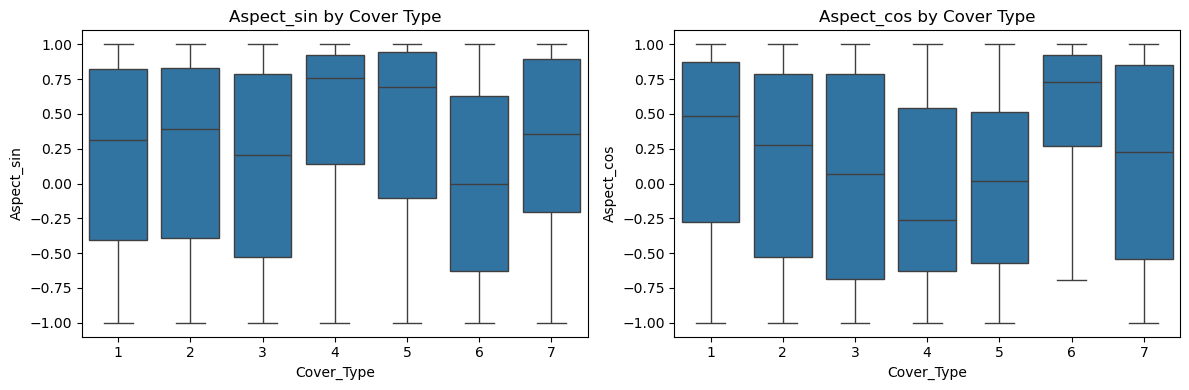

In [9]:
df["Aspect_sin"] = np.sin(np.deg2rad(df["Aspect"]))
df["Aspect_cos"] = np.cos(np.deg2rad(df["Aspect"]))

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x="Cover_Type", y="Aspect_sin", data=df, showfliers=False, ax=axes[0])
axes[0].set_title("Aspect_sin by Cover Type")

sns.boxplot(x="Cover_Type", y="Aspect_cos", data=df, showfliers=False, ax=axes[1])
axes[1].set_title("Aspect_cos by Cover Type")

plt.tight_layout()
plt.show()


As we can see, the sin and cos show us that even though there is a strong variance, the median values give us some information about the cover type. It seems that the aspect is not a stand alone signal, but it might help when combined to other features

## Analyzing the correlation between the continuous variables

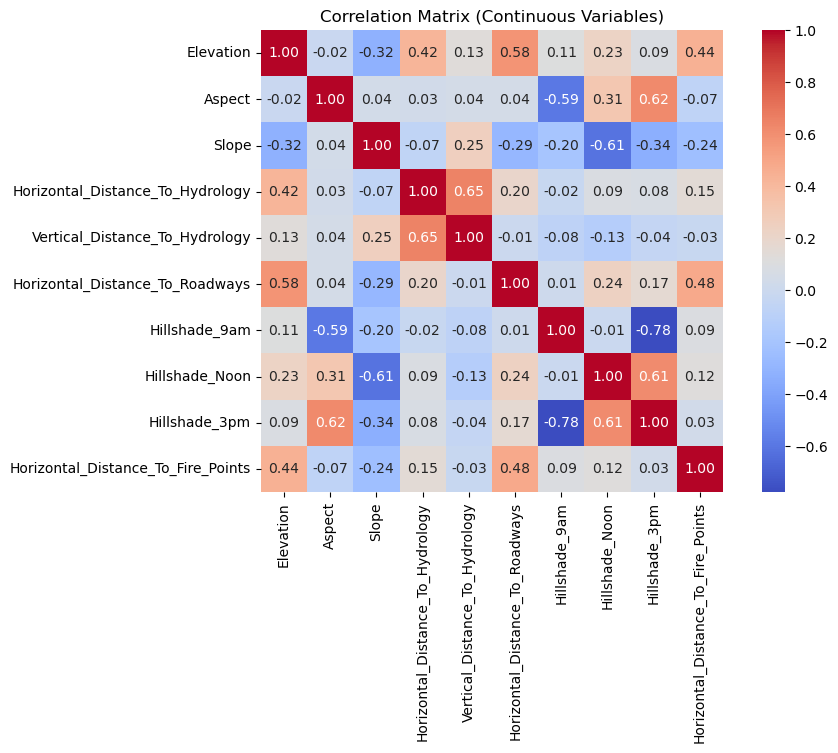

In [13]:
corr = df[continuous_col].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Matrix (Continuous Variables)")
plt.show()

The correlation matrix guides us to understand what columns are strongly correlated to other. This info will help us later in the feature engineering and selection to avoid overfitting. As per the column, we can state that there exist a strong correlation between the vertical and horizontal distance to hydrology, hillshade at 3pm and 9am, hillshade at noon and 3pm, among others.

## Analyzing the Winderness Area types

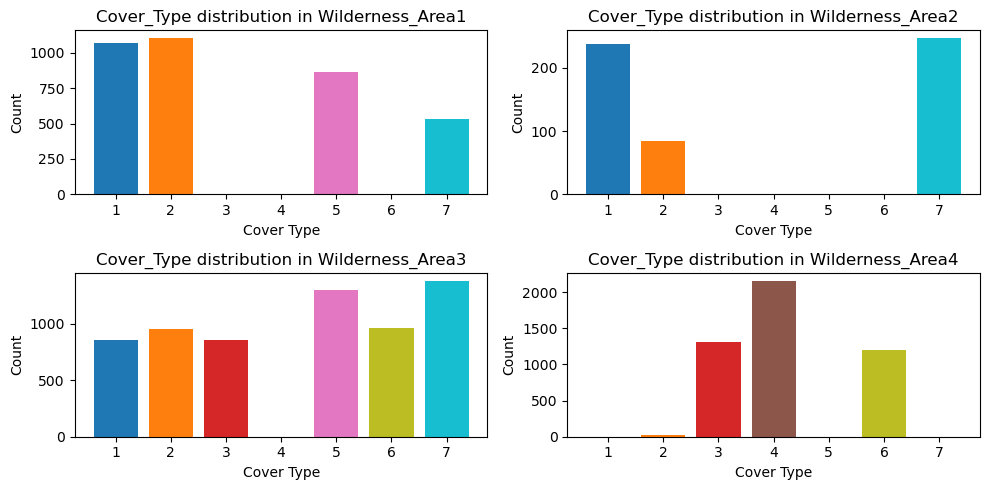

In [16]:
wilderness_cols = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()
colors = plt.colormaps["tab10"].resampled(7)

for ax, col in zip(axes, wilderness_cols):
    counts = df.groupby("Cover_Type")[col].sum()
    ax.bar(counts.index, counts.values, color = [colors(i) for i in range(7)])
    ax.set_title(f"Cover_Type distribution in {col}")
    ax.set_xlabel("Cover Type")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

As seen above, the wilderness area is a good signal to determine the cover_type.

## Analyzing the soil types

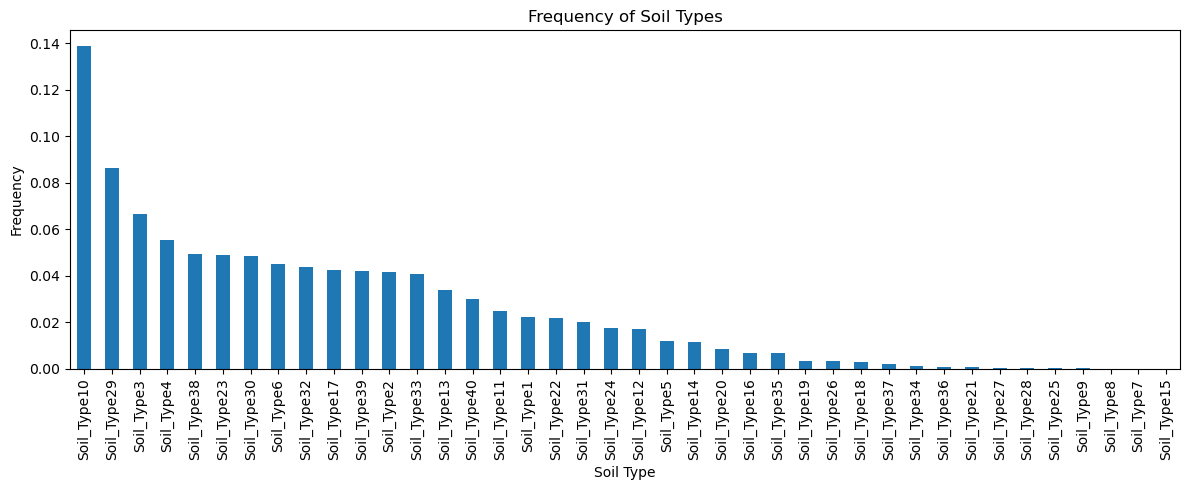

In [22]:
soil_cols = [c for c in df.columns if c.startswith("Soil_Type")]
soil_freq = df[soil_cols].sum().sort_values(ascending=False)/len(df)

plt.figure(figsize=(12, 5))
soil_freq.plot(kind="bar")
plt.ylabel("Frequency")
plt.xlabel("Soil Type")
plt.title("Frequency of Soil Types")
plt.tight_layout()
plt.show()

Strong concentration in terms of soil type. The problem is that it might impact training due to overfitting. The ideia is to aggregate based on the ELU

In [23]:
SOIL_TO_ELU = {
    1: 2702,  2: 2703,  3: 2704,  4: 2705,  5: 2706,
    6: 2717,  7: 3501,  8: 3502,  9: 4201, 10: 4703,
   11: 4704, 12: 4744, 13: 4758, 14: 5101, 15: 5151,
   16: 6101, 17: 6102, 18: 6731, 19: 7101, 20: 7102,
   21: 7103, 22: 7201, 23: 7202, 24: 7700, 25: 7701,
   26: 7702, 27: 7709, 28: 7710, 29: 7745, 30: 7746,
   31: 7755, 32: 7756, 33: 7757, 34: 7790, 35: 8703,
   36: 8707, 37: 8708, 38: 8771, 39: 8772, 40: 8776
}

In [27]:
def add_elu_features(df, soil_prefix="Soil_Type", drop_soil_dummies=False):

    df = df.copy()
    
    soil_cols = [c for c in df.columns if c.startswith(soil_prefix)]

    soil_idx = (
        df[soil_cols]
        .idxmax(axis=1)
        .str.replace(soil_prefix, "", regex=False)
        .astype(int)
    )
    
    df["ELU"] = soil_idx.map(SOIL_TO_ELU)
    
    df["ELU_climatic"] = df["ELU"].astype(str).str[0].astype(int)
    df["ELU_geologic"] = df["ELU"].astype(str).str[1].astype(int)
    
    if drop_soil_dummies:
        df.drop(columns=soil_cols, inplace=True)
    
    return df

In [29]:
df = add_elu_features(df)

In [35]:
pd.crosstab(df["Cover_Type"], df["ELU_climatic"], normalize="columns") * 100

ELU_climatic,2,3,4,5,6,7,8
Cover_Type,,,,,,,
1,0.027241,66.666667,2.031394,0.000000,0.379747,35.307560,11.800303
2,1.607192,33.333333,14.989227,0.000000,3.924051,29.803847,0.857287
3,36.665759,0.000000,23.237919,3.468208,5.949367,0.114264,0.000000
4,39.825661,0.000000,5.724838,71.676301,49.113924,0.000000,0.000000
5,5.529828,0.000000,15.204678,0.000000,25.443038,24.033517,0.000000
6,16.044674,0.000000,38.811942,24.855491,15.189873,2.799467,0.000000
7,0.299646,0.000000,0.000000,0.000000,0.000000,7.941345,87.342410


In [36]:
pd.crosstab(df["Cover_Type"], df["ELU_geologic"], normalize="columns") * 100

ELU_geologic,1,2,5,7
Cover_Type,,,,
1,7.001795,55.287570,66.666667,11.481625
2,6.642729,22.634508,33.333333,14.243714
3,4.757630,0.000000,0.000000,16.301741
4,45.960503,0.000000,0.000000,12.750484
5,17.324955,13.079777,0.000000,14.127660
6,18.222621,0.092764,0.000000,15.133462
7,0.089767,8.905380,0.000000,15.961315


In [37]:
df["ELU_climatic"].value_counts(normalize=True).sort_index() * 100

ELU_climatic
2    24.279101
3     0.019841
4    21.488095
5     1.144180
6     5.224868
7    34.728836
8    13.115079
Name: proportion, dtype: float64

In [40]:
df["ELU_geologic"].value_counts(normalize=True).sort_index() * 100

ELU_geologic
1     7.367725
2     7.129630
5     0.019841
7    85.482804
Name: proportion, dtype: float64

Even the climatic and geologic are not balanced. They also concentrate themself in some specific cover types

In [41]:
# maybe explore the interaction between 2 different features